# Wine Fraud Detection

## Problem Statement

In this dataset, we've to predict if the wine is fraud or legit. We are given the contents of the wine in the dataset

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset using pandas**

In [2]:
df = pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


<AxesSubplot:xlabel='quality', ylabel='count'>

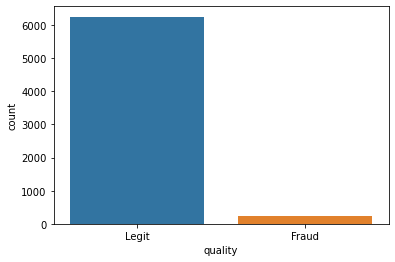

In [4]:
sns.countplot(data=df, x='quality')

**Checking for any missing data**

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [24]:
X = df.drop('quality', axis=1)
X = pd.get_dummies(X)

In [25]:
y = df['quality']

**Splitting the data to train and test the model**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Since here, we are using K-Nearest Neighbour, we've to scale the data**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.metrics import accuracy_score

**To find the best K value, we use different K values in our model and fit it to the data. We then make predictions and plot**

In [34]:
test_error_rates = []

for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, pred)
    test_error_rates.append(test_error)

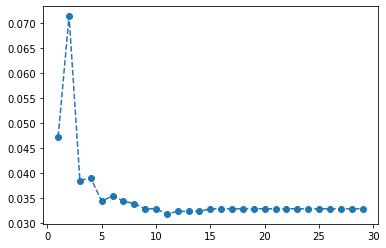

In [35]:
plt.plot(range(1,30), test_error_rates, 'o--')

**From the above elbow graph, we choose K=5 for out model and then we fit and make predictions**

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
preds = knn_model.predict(X_test)

**For the accuracy, we import classification_report and plot_confusion_matrix**

In [39]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       Fraud       0.36      0.06      0.11        64
       Legit       0.97      1.00      0.98      1886

    accuracy                           0.97      1950
   macro avg       0.67      0.53      0.54      1950
weighted avg       0.95      0.97      0.95      1950



/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


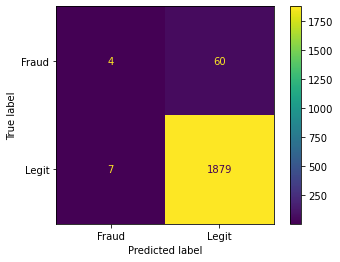

In [41]:
plot_confusion_matrix(knn_model, X_test, y_test)